# Decision Tree

## Imports
In this section we import the libraries necessary to analyse our data.

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Import & Pre-process Data
The first thing we do is read in our data. This data can be found at https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data. Once we've done this we drop all rows with empty values and the `id` column as it is not necessary for this model. After dropping any unnecessary data, we take the `weight`, `ap_hi`, `ap_low` and `age` columns and convert them to be categorical.

For the `weight` column we firstly drop all weights below 40KG as any weight below this would be unrealistic. After this we split the weights into 4 different categories: "40 - 60", "61 - 80", "81 - 100" and "100+". We then apply these categories to the data inside the `weight` column.

With the `ap_hi` and `ap_low` columns we first get the average blood pressure by getting the mean value of the two columns combined. After this we categorize the data with a "High" blood pressure being above 120, "Medium" being between 80 and 120 and 'Low' being under 80.

For the `ages` column we first divide the column by 365 to convert the data from days into years. After this we once again split the data into the categories "Under 18", "18 - 21", "21 - 40", "41 - 60", "61 - 80" and "80+".

Finally, we categorize the `height` column into,

In [171]:
# Read in data
df=pd.read_csv("cardio_train.csv", sep=";")

# Drop unnecessary columns
df = df.dropna(axis=0)
df = df.drop('id', axis=1)

# Ensure height is in meters
df['height_m'] = df['height'] / 100

# Calculate BMI
df['BMI'] = df['weight'] / (df['height_m'] ** 2)

# Drop the temporary height_m column if not needed
df = df.drop(columns=['height_m'])

# Optionally categorize BMI (e.g., underweight, normal, overweight, obese)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['BMI'].apply(categorize_bmi)

# Get average blood pressure using high and low values
df['bp_mean'] = df[['ap_hi', 'ap_lo']].mean(axis=1)

# Categorize average blood pressure for classification
def categorize_bp(mean_bp):
    if mean_bp > 120:
        return 'High'
    elif mean_bp >= 80:
        return 'Normal'
    else:
        return 'Low'

# Apply the categorization function
df['bp_category'] = df['bp_mean'].apply(categorize_bp)

# Convert ages to years
df['ages_year'] = df['age'] // 365

# Categorize ages into age groups
def categorize_age(ages_year):
    if ages_year < 18:
        return 'Under 18'
    elif 18 <= ages_year <= 21:
        return '18 - 21'
    elif 21 < ages_year <= 40:
        return '21 - 40'
    elif 40 < ages_year <= 60:
        return '41 - 60'
    elif 60 < ages_year <= 80:
        return '61 - 80'
    else:
        return '80+'

# Apply categorization 
df['age_category'] = df['ages_year'].apply(categorize_age)

# Encode ages
encoder = LabelEncoder()
df['BMI_category_encoded'] = LabelEncoder().fit_transform(df['BMI_category'])
df['bp_category_encoded'] = encoder.fit_transform(df['bp_category'])
df['age_category_encoded'] = encoder.fit_transform(df['age_category'])

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,cardio,BMI,BMI_category,bp_mean,bp_category,ages_year,age_category,BMI_category_encoded,bp_category_encoded,age_category_encoded
0,18393,2,168,62.0,110,80,1,1,0,0,...,0,21.967120,Normal,95.0,Normal,50,41 - 60,0,2,1
1,20228,1,156,85.0,140,90,3,1,0,0,...,1,34.927679,Obese,115.0,Normal,55,41 - 60,1,2,1
2,18857,1,165,64.0,130,70,3,1,0,0,...,1,23.507805,Normal,100.0,Normal,51,41 - 60,0,2,1
3,17623,2,169,82.0,150,100,1,1,0,0,...,1,28.710479,Overweight,125.0,High,48,41 - 60,2,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,...,0,23.011177,Normal,80.0,Normal,47,41 - 60,0,2,1


## Fit Data

In [172]:
# Split data into training and testing
X = df[['BMI_category_encoded', 'age_category_encoded',  'bp_category_encoded', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
Y = df['cardio']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create decision tree model and fit data
tree = RandomForestClassifier()
tree.fit(X_train, Y_train)  # Fit the model using training data

# Use tree to predict and display accuracy
Y_pred = tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

## Display Data
Once our model has been fitted with data and is making predictions, we display the data using a confusion matrix to show the amount of True Positives, False Positives, True Negatives and False Negatives that our decision tree has predicted. We display some metrics about the model, which are as follows:
- Accuracy: The percentage of all predictions (both "yes" and "no") that the model got correct.
- Precision: Of all the cases where the model predicted "yes," the percentage that were actually true positives.
- Recall: Of all the actual "yes" cases in the data, the percentage that the model successfully identified.
- F1-Score: A balanced percentile measure of the model's precision and recall.



Accuracy: 0.65
Precision: 0.70
Recall: 0.53
F1-Score: 0.60


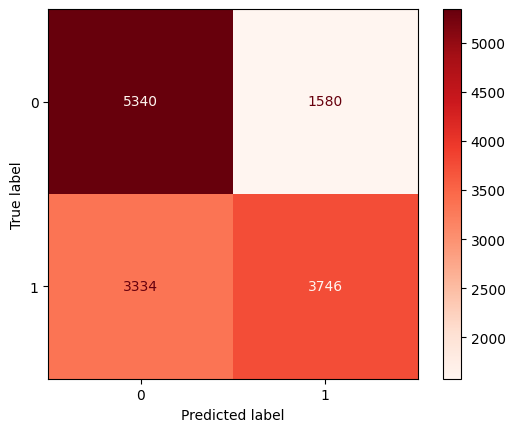

In [173]:
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")
print(f"Precision: {precision_score(Y_test, Y_pred):.2f}")
print(f"Recall: {recall_score(Y_test, Y_pred):.2f}")
print(f"F1-Score: {f1_score(Y_test, Y_pred):.2f}")

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, cmap='Reds')

In [174]:
plt.figure(figsize=(20, 10))  # Set the size of the figure
plot_tree(
    tree,
    feature_names=X.columns,    # Use feature names from the dataset
    class_names=['No Cardiovascular Disease', 'Cardiovascular Disease'],  # Classes
    filled=True,                # Color the nodes
    rounded=True,               # Rounded corners for better aesthetics
    fontsize=12                 # Adjust font size
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier() instead.

<Figure size 2000x1000 with 0 Axes>